In [1]:
import os
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

table = 'customers'
query = f"SELECT event_type FROM {table};"

In [2]:
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_user = os.getenv('DB_USER')
db_pass = os.getenv('DB_PASS')
db_name = os.getenv('DB_NAME')

connection = f'postgresql://{db_user}:{db_pass}@{db_host}:{db_port}/{db_name}'
engine = create_engine(connection)


In [3]:
# Ejecutar la consulta y cargar los datos en un DataFrame
try:
    df = pd.read_sql(query, engine)
except Exception as e:
    print(f"Error al conectar o consultar la base de datos: {e}")

In [4]:
# Calcular la cantidad de ocurrencias de cada tipo de evento
event_counts = df['event_type'].value_counts()

# Calcular el porcentaje de cada tipo de evento
event_percentages = event_counts / event_counts.sum() * 100

# Mostrar las frecuencias y porcentajes de cada event_type
print(event_percentages)

event_type
view                50.159147
cart                28.681352
remove_from_cart    14.342246
purchase             6.817255
Name: count, dtype: float64


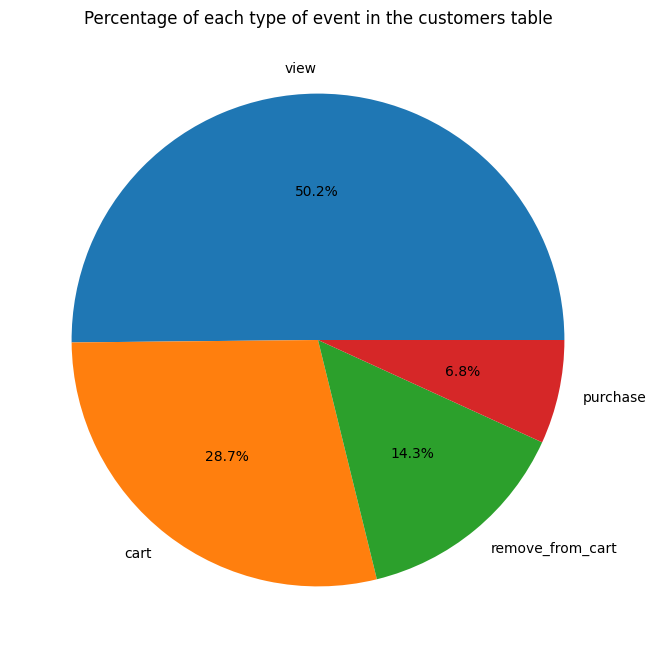

In [5]:
# Crear el gráfico circular
plt.figure(figsize=(8, 8))  # Ajustar el tamaño del gráfico
plt.pie(
    event_percentages, 
    labels=event_percentages.index,  # Usar los nombres de los eventos como etiquetas
    autopct='%1.1f%%',  # Mostrar los porcentajes con 1 decimal
    #startangle=140  # Girar el inicio del gráfico
)

# Añadir un título
plt.title('Percentage of each type of event in the customers table')

# Mostrar el gráfico
plt.show()